In [20]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [21]:
bins = 1000
lat_min, lat_max = 41.04961, 41.24961
lon_min, lon_max = -8.71099, -8.51099

In [22]:
data = pd.read_csv('./data/test_synthetic_data.csv',
                       chunksize=1000,      
                       usecols=['POLYLINE'],
                       converters={'POLYLINE': lambda x: json.loads(x)})

In [23]:
# process data in chunks to avoid using too much memory
z = np.zeros((bins, bins))
for chunk in data:
    latlon = np.array([(lat, lon) 
                        for path in chunk.POLYLINE
                        for lon, lat in path if len(path) > 0])
    print(chunk, latlon)
    z += np.histogram2d(*latlon.T, bins=bins, 
                        range=[[lat_min, lat_max],
                                [lon_min, lon_max]])[0]

                                              POLYLINE
0    [[-8.618571, 41.141394000000005], [-8.619108, ...
1    [[-8.640099, 41.1598485], [-8.640966, 41.15995...
2    [[-8.613171000000001, 41.1403545], [-8.6137965...
3    [[-8.5746915, 41.151946499999994], [-8.5747004...
4    [[-8.6459715, 41.1805035], [-8.645998500000001...
5    [[-8.615178, 41.1408], [-8.6141025, 41.141223]...
6    [[-8.580231000000001, 41.1454935], [-8.5818240...
7    [[-8.617545, 41.146015500000004], [-8.6172525,...
8    [[-8.6117895, 41.140566], [-8.611892999999998,...
9    [[-8.615178, 41.1408225], [-8.6139855, 41.1412...
10   [[-8.620029, 41.1478695], [-8.620407, 41.14812...
11   [[-8.562424499999999, 41.1683805], [-8.5623885...
12   [[-8.618184, 41.1550065], [-8.616693, 41.15478...
13   [[-8.608171500000001, 41.15349], [-8.6070645, ...
14   [[-8.6122215, 41.140525499999995], [-8.612835,...
15   [[-8.5846455, 41.1647805], [-8.5836465, 41.164...
16   [[-8.584479, 41.1630795], [-8.585145, 41.16282...
17   [[-8.

In [24]:
log_density = np.log(20 + z)

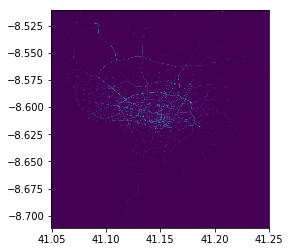

In [25]:
plt.imshow(log_density[::-1,:], # flip vertically
           extent=[lat_min, lat_max, lon_min, lon_max])
plt.savefig('heatmap_test_synthetic_data.png', figsize=(8, 6), dpi=1000)

In [7]:
test = pd.read_csv('./data/train.csv')

In [8]:
export_test = test.head(10000)
export_test.to_csv('data/test.csv')

In [163]:
data = pd.read_csv('./data/test.csv',
                       chunksize=1000,      
                       usecols=['POLYLINE'],
                       converters={'POLYLINE': lambda x: json.loads(x)})
input_data = [path for chunk in data for path in chunk.POLYLINE]

In [164]:
input_data = np.array(input_data)
max_len = max([np.array(i).shape[0] for i in input_data])
for i in range(len(input_data)):
    a = np.array(input_data[i])
    a = a.reshape(a.shape[0], 2)
    b = np.array([np.zeros(max_len - len(input_data[i]))])
    b = np.concatenate((b, b), axis=0)
    b = b.reshape(b.shape[1], 2)
    input_data[i] = np.concatenate((a, b), axis=0)

In [170]:
input_data.shape

(10000,)

In [174]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable